In [1]:
import jax
import jax.numpy as jnp
from tqdm import tqdm 
import pandas as pd
import wandb
#import argparse
import scipy
import pickle 
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.backends.backend_pdf as backend_pdf
import subprocess
import time

from bridge_sampling.BFFG import backward_filter, forward_guide, forward_guide_edge, get_logpsi
from bridge_sampling.setup_SDEs import Stratonovich_to_Ito, dtsdWsT, dWs
from bridge_sampling.noise_kernel import Q12
from bridge_sampling.helper_functions import *

from mcmc import *
import subprocess
import time

In [10]:
# MCMC settings
num_chains = 3
num_samples = 3000
dt = 0.05
lambd = 0.98
obs_var = 0.001
rb = 1
prior_sigma_min = 0.1
prior_sigma_max = 1.0
prior_alpha_min = 0.00001
prior_alpha_max = 0.01
proposal_sigma_tau = 0.002
proposal_alpha_tau = 0.002
seed_start = np.random.randint(0,1000_000_000)

In [11]:
screen_sessions = run_mcmc_in_screens(
        num_chains=3,
        script_path="run_mcmc.py",
        seed_param="--seed_mcmc",  # Adjust according to your script's parameters
        seed_start=seed_start,  # Starting seed
        script_args={
        "--outputpath": f"seed=4024352252_sigma=0.6_alpha=0.15_dt=0.05/mcmc_seed={seed_start}_N={num_samples}_dt={dt}_lambd={lambd}_obs_var={obs_var}_rb={rb}_prior_sigma_min={prior_sigma_min}_prior_sigma_max={prior_sigma_max}_prior_alpha_min={prior_alpha_min}_prior_alpha_max={prior_alpha_max}_proposal_sigma_tau={proposal_sigma_tau}_proposal_alpha_tau={proposal_alpha_tau}",
        "--phylopath": "../data/chazot_subtree_rounded.nw",
        "--datapath": "seed=4024352252_sigma=0.6_alpha=0.15_dt=0.05/procrustes_aligned.csv",
        "--dt": dt,
        "--lambd": lambd,
        "--obs_var": obs_var,
        "--rb": rb,
        "--N": num_samples,
        "--prior_sigma_min": prior_sigma_min,
        "--prior_sigma_max": prior_sigma_max,
        "--prior_alpha_min": prior_alpha_min,
        "--prior_alpha_max": prior_alpha_max,
        "--proposal_sigma_tau": proposal_sigma_tau,
        "--proposal_alpha_tau": proposal_alpha_tau, 
        #"--wandb_project": "SPMS",
        "--use_wandb": True
    }
)

Starting chain 1 with seed 128917087 in screen 'mcmc_chain_1'
Starting chain 2 with seed 128917088 in screen 'mcmc_chain_2'
Starting chain 3 with seed 128917089 in screen 'mcmc_chain_3'

3 MCMC chains started in separate screen sessions.
To attach to a screen session: screen -r <screen_name>
To detach from a screen session: Ctrl+A, then D
Screen sessions: mcmc_chain_1, mcmc_chain_2, mcmc_chain_3


# Visualize results 

In [6]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

def load_mcmc_results(filepath_pattern):
    """
    Load MCMC results from pickle files matching the given pattern.
    
    Args:
        filepath_pattern: Pattern to match pickle files (e.g., "results/chain_*.pkl")
        
    Returns:
        List of loaded results
    """
    results = []
    for filepath in sorted(glob.glob(filepath_pattern)):
        print(f"Loading {filepath}")
        with open(filepath, 'rb') as f:
            results.append(pickle.load(f))
    return results

In [7]:
results_path = "seed=4024352252_sigma=0.6_alpha=0.15_dt=0.05/mcmc/results_*.pkl"  # Adjust pattern as needed
chain_results = load_mcmc_results(results_path)
param_names = ["sigmas", "alphas"]  # Replace with your actual parameter names
len(chain_results)

Loading seed=4024352252_sigma=0.6_alpha=0.15_dt=0.05/mcmc/results_chain=629788080.pkl
Loading seed=4024352252_sigma=0.6_alpha=0.15_dt=0.05/mcmc/results_chain=629788081.pkl
Loading seed=4024352252_sigma=0.6_alpha=0.15_dt=0.05/mcmc/results_chain=629788082.pkl


3

In [11]:
chain_results[0]['acceptpath']

array([1., 0., 0., ..., 0., 1., 0.], shape=(3001,))

In [12]:
[np.mean(result['acceptpath']) for result in chain_results if result is not None]

[np.float64(0.6144618460513163),
 np.float64(0.003998667110963012),
 np.float64(0.01166277907364212)]

[[<matplotlib.lines.Line2D at 0x14edb9310>],

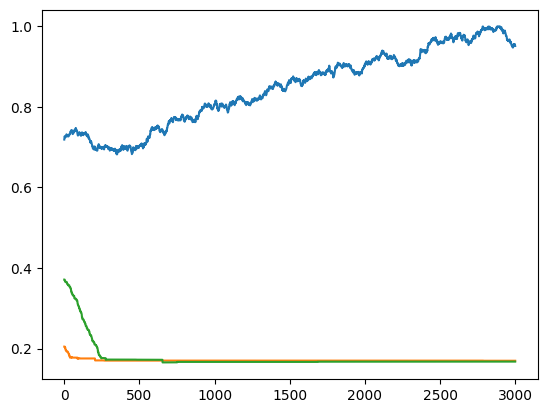

In [8]:
[plt.plot(chain_results[i]['sigmas']) for i in range(len(chain_results))]

[[<matplotlib.lines.Line2D at 0x14ef25450>],

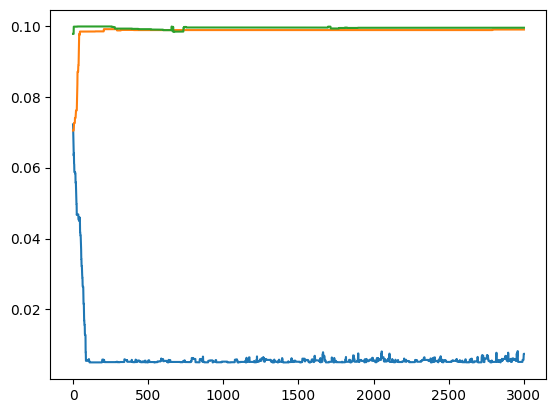

In [9]:
[plt.plot(chain_results[i]['alphas']) for i in range(len(chain_results))]

In [8]:
# Example usage
if __name__ == "__main__":
    # Path to your MCMC results
    results_path = "results/mcmc_*.pkl"  # Adjust pattern as needed
    
    # Load results
    chain_results = load_mcmc_results(results_path)
    
    # Define parameter names (customize for your model)
    param_names = ["sigma", "alpha"]  # Replace with your actual parameter names
    
    # Plot traces and save
    fig, axes = plot_parameter_traces(chain_results, param_names)
    plt.savefig("parameter_traces.pdf")
    
    # Plot convergence diagnostics and save
    fig2, axes2 = plot_convergence_diagnostics(chain_results, param_names)
    plt.savefig("convergence_diagnostics.pdf")
    
    # Show plots
    plt.show()

NameError: name 'plot_parameter_traces' is not defined